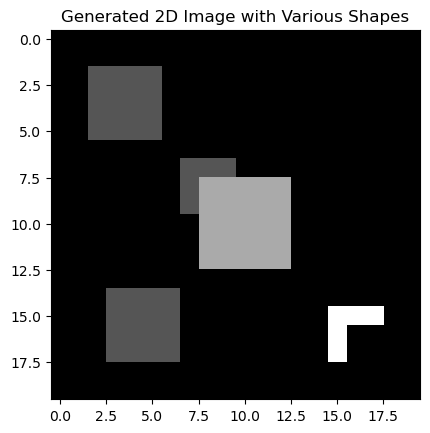

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import rectangle, disk

# Define dimensions of the image
height, width = 20, 20
image = np.zeros((height, width), dtype=int)


def add_rectangle(image, top_left, bottom_right):
    x1, y1 = top_left
    x2, y2 = bottom_right
    rr, cc = rectangle(start=(x1, y1), end=(x2, y2), shape=image.shape)
    image[rr, cc] = 1

# Helper function to add a circle
def add_circle(image, center, radius):
    rr, cc = disk(center=center, radius=radius, shape=image.shape)
    image[rr, cc] = 2  # Using '2' for circles to differentiate shapes

# Helper function to add an L-shape or other custom shapes
def add_custom_shape(image, shape_coords, value=3):
    for (x, y) in shape_coords:
        if 0 <= x < image.shape[0] and 0 <= y < image.shape[1]:
            image[x, y] = value

# Adding shapes to the image
add_rectangle(image, (2, 2), (5, 5))
add_rectangle(image, (7, 7), (9, 9))
add_circle(image, (10, 10), 3)
add_rectangle(image, (14, 3), (17, 6))

L_shape_coords = [(15, 15), (15, 16), (15, 17), (16, 15), (17, 15)]
add_custom_shape(image, L_shape_coords, value=3)


plt.imshow(image, cmap='gray', interpolation='nearest')
plt.title("Generated 2D Image with Various Shapes")
plt.show()

In [2]:
image.shape

print(image)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 2 2 2 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 2 2 2 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 3 3 3 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [3]:
from collections import defaultdict
rows = image.shape[0]
objects = 0
start_idx = None
end_idx = None
lookup_dict = defaultdict(list)
for r in range(rows): # iterate through rows of the image
  for idx_0, val_0 in enumerate(image[r]): # iterate over values in the row
    if idx_0 > 0 and idx_0 < len(image[r]-1) and val_0 > 0: 
      if image[r][idx_0-1] == 0:       
        start_idx = idx_0
        lookup_dict[r].append((r, idx_0))
      elif image[r][idx_0+1] == 0:
        end_idx = idx_0
        lookup_dict[r].append((r, idx_0))
    # if start_idx and end_idx:
    #   img_len = end_idx - start_idx + 1
    #   print(img_len)
    
    # if r+1 < rows:
    #   for idx_1, val_1 in enumerate(image[r+1]):
    #     if idx_0 == idx_1 and val_0 > 0 and val_1 > 0:
    #       if val_0!=val_1:
    #         objects += 1

In [19]:
contiguous_rows = []
tmp = set()
keys_list = list(lookup_dict.keys())
for idx, key in enumerate(keys_list):
    if idx > 0 and idx <= len(keys_list):
        if keys_list[idx - 1] == key - 1:
            print(key, keys_list[idx - 1])
            tmp.add(key)
            tmp.add(keys_list[idx - 1])
        else:
            print('here')
            contiguous_rows.append(tmp)
            tmp = set()
if tmp:
    contiguous_rows.append(tmp)

3 2
4 3
5 4
here
8 7
9 8
10 9
11 10
12 11
here
15 14
16 15
17 16


In [13]:
lookup_dict

defaultdict(list,
            {2: [(2, 2), (2, 5)],
             3: [(3, 2), (3, 5)],
             4: [(4, 2), (4, 5)],
             5: [(5, 2), (5, 5)],
             7: [(7, 7), (7, 9)],
             8: [(8, 7), (8, 12)],
             9: [(9, 7), (9, 12)],
             10: [(10, 8), (10, 12)],
             11: [(11, 8), (11, 12)],
             12: [(12, 8), (12, 12)],
             14: [(14, 3), (14, 6)],
             15: [(15, 3), (15, 6), (15, 15), (15, 17)],
             16: [(16, 3), (16, 6), (16, 15)],
             17: [(17, 3), (17, 6), (17, 15)]})

In [17]:
keys_list

[2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17]

In [20]:
contiguous_rows

[{2, 3, 4, 5}, {7, 8, 9, 10, 11, 12}, {14, 15, 16, 17}]

In [21]:
lower_obj_ct = len(contiguous_rows)